Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

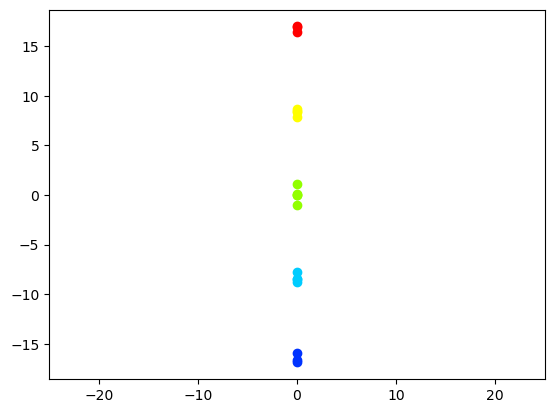

In [1]:
from pyoptools.all import *
from math import sqrt, pi, radians,cos, sin
import random
import pandas as pd
import numpy as np


lens_radius = 25
microlens_radius = 2.7
CCD = CCD(size=(45, 45))
L1 = SphericalLens(radius=lens_radius, curvature_s1=1./100., curvature_s2=-1./100., thickness=10, material=material.schott["N-BK7"])

#microlens = SphericalLens(radius=microlens_radius, curvature_s1=1./100., curvature_s2=-1./100., thickness=1.2, material=material.schott["N-BK7"])
MShape = Circular(radius=microlens_radius)
microlens = SphericalLens(radius=microlens_radius, curvature_s1=1./100., curvature_s2=-1./100., thickness=0.5, material=material.schott["N-BK7"])


num_xmicrolens = 8
num_ymicrolens = 8
microlens_pitch = microlens_radius * 2
array_z_distance = 95
CCD_z = 98


microlens_locations = []
for i in range(num_xmicrolens):
    for j in range(num_ymicrolens):
        x_pos = i * microlens_pitch 
        y_pos = j * microlens_pitch
        
        microlens_location = (x_pos - 16, y_pos - 20, array_z_distance)
        microlens_locations.append(microlens_location)


lens_location = (0, 0, 0)
CCD_location = (0, 0, CCD_z)

complist = [(L1, lens_location, (0, 0, 0)), (CCD, CCD_location, (0, 0, 0))]
#OA = Ray(pos=(0,0,0), dir=(0,0,1), intensity=100, wavelength=.550)

for m in microlens_locations:
    complist.append((microlens, m, (0, 0, 0)))
    
S = System(complist=complist, n=1)
    
num_ps = 100
#source_wavelength = 0.550
num_rays = 2

source_z_distance = -115


R = [] 
for y in np.linspace(-20, 20, 5):
    for i in range(-10, 11, 5):
        
        angle_degrees = i
        angle_radians = radians(angle_degrees)
    
        dir_y = sin(angle_radians) 
        dir_z = cos(angle_radians)
        
        if i == -10:
            s_wavelength = 0.450
        elif i == -5:
            s_wavelength = 0.480
        elif i == 0:
            s_wavelength = 0.550
        elif i == 5:
            s_wavelength = 0.580
        elif i == 10:
            s_wavelength = 0.650
        
        ray = Ray(pos=(0, y, source_z_distance), dir=(0, dir_y, dir_z), wavelength=s_wavelength)
        R.append(ray)


#f = microlens.paraxial_constants()
#print(f) 

S.ray_add(R)
#S.ray_add(OA)
S.propagate()
'''
path = '/Users/screa/Documents/IAState/FacultyMentor/Switchillator/Plenoptic/CMLAL.xlsx'
xlsx_name = 'CMLAL.xlsx'

data = []
for CHL,R in CCD.hit_list:
    data.append(CHL)
    #print(CHL)

df = pd.DataFrame(data, columns=['x', 'y', 'z'])
df.to_excel(excel_writer=path, sheet_name=xlsx_name, index=False)
'''

spot_diagram_c(CCD)
Plot3D(S, center=(0, 0, 200), size=(450, 200), scale=2, rot=[(0, -pi/2, 0), (pi/20, -pi/10, 0)])
